In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
import pickle
with open('../count-power-transformer.pkl', 'rb') as inf:
    pt = pickle.load(inf)
data = pd.read_pickle('../data-fill-windspeed.pkl.xz')
print(pt, pt.lambdas_)
data.head()

PowerTransformer(copy=True, method='box-cox', standardize=False) [0.31567024]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,13.00202,3,...,0,0,1,0,0,0,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,10.80107,8,...,0,0,1,0,0,0,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,10.80107,5,...,0,0,1,0,0,0,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.50235,3,...,0,0,1,0,0,0,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.50235,0,...,0,0,1,0,0,0,2011,1,1,4


## Method I: pair plot and join plot

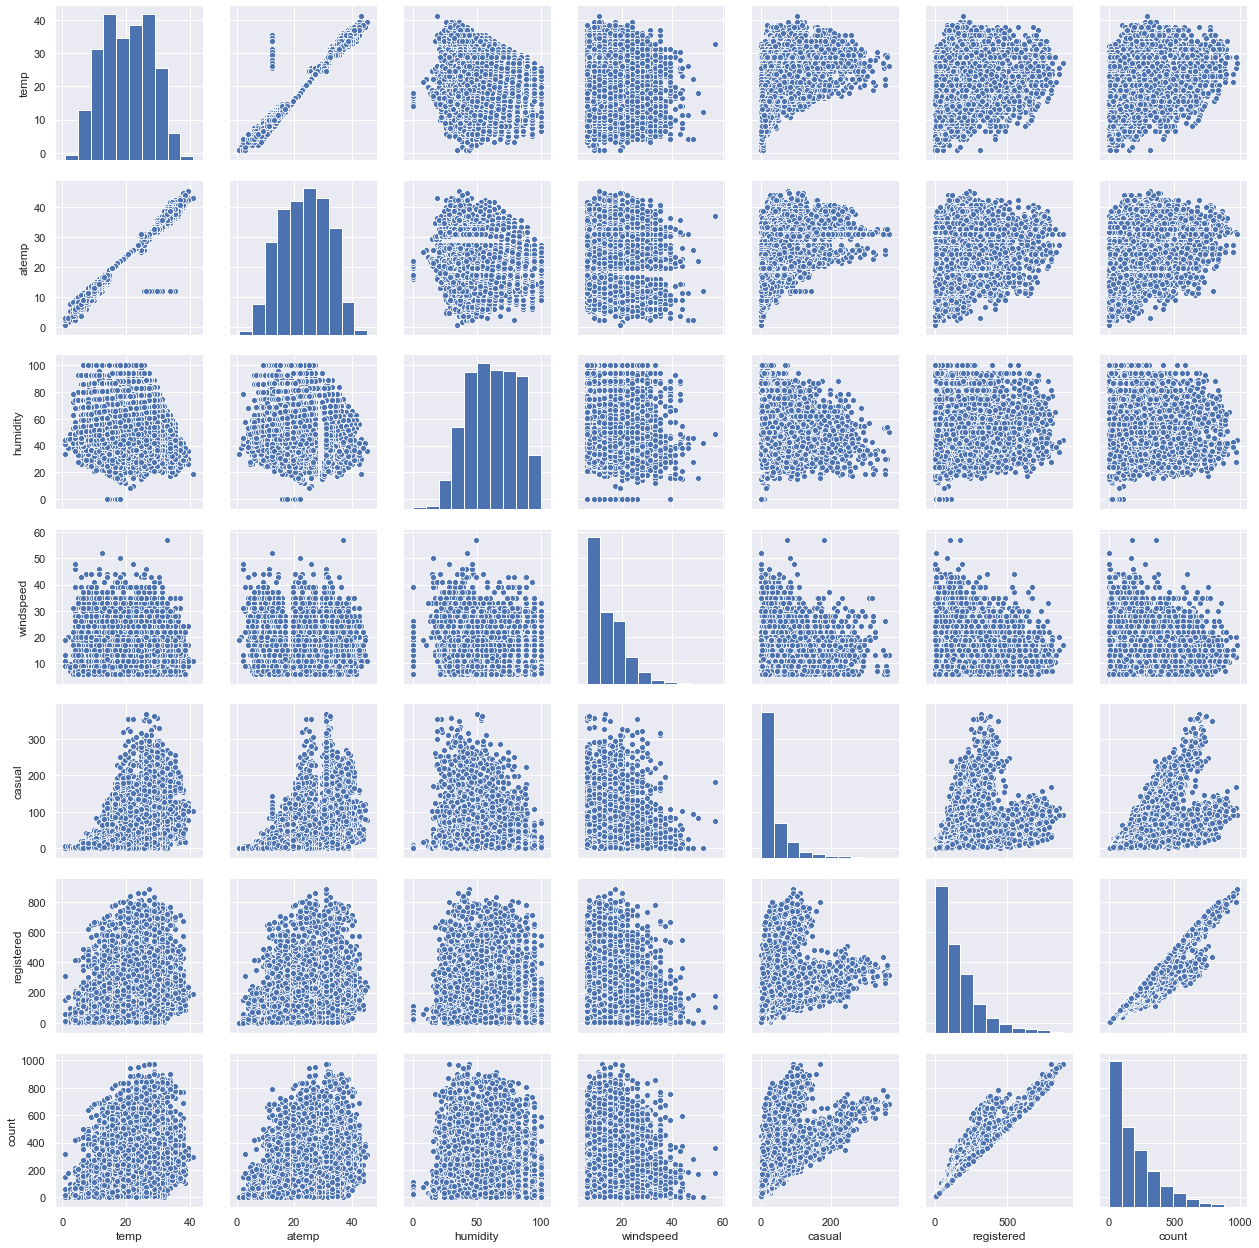

In [3]:
sns.pairplot(
    data,
    vars=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
)

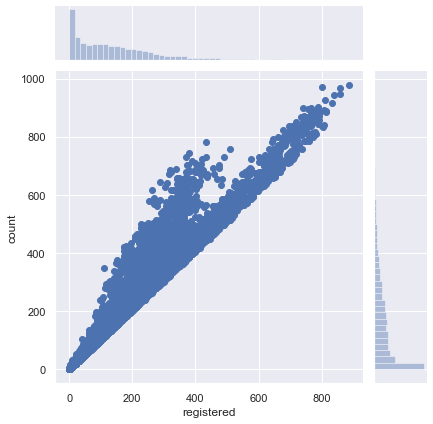

In [4]:
sns.jointplot(x=data['registered'], y=data['count'])

## Method II: coorelation and heat map

In [5]:
cor_mat = data[
    [
        'temp', 'atemp',
        'humidity', 'windspeed',
        'casual', 'registered', 'count',
        'season_1', 'season_2', 'season_3', 'season_4',
        'weather_1', 'weather_2', 'weather_3', 'weather_4',
    ]
].corr()

In [6]:
cor_mat

,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
temp,1.000000,0.984948,-0.064949,0.001976,0.467097,0.318571,0.394454,-0.565655,0.192661,0.635975,-0.266220,0.058430,-0.046925,-0.025715,-0.014800
atemp,0.984948,1.000000,-0.043536,-0.034032,0.462067,0.314635,0.389784,-0.569082,0.204421,0.607090,-0.245690,0.055825,-0.040792,-0.031154,-0.013901
humidity,-0.064949,-0.043536,1.000000,-0.342631,-0.348187,-0.265458,-0.317371,-0.166208,-0.031095,0.067308,0.129018,-0.374837,0.222398,0.295894,0.012010
windspeed,0.001976,-0.034032,-0.342631,1.000000,0.110561,0.092246,0.107408,0.116659,0.048089,-0.088430,-0.075635,0.029304,-0.057453,0.042447,-0.011215
casual,0.467097,0.462067,-0.348187,0.110561,1.000000,0.497250,0.690414,-0.235222,0.132405,0.187726,-0.086258,0.119728,-0.062184,-0.108853,-0.005760
registered,0.318571,0.314635,-0.265458,0.092246,0.497250,1.000000,0.970948,-0.207278,0.046969,0.102142,0.056961,0.086621,-0.028997,-0.104936,0.000155
count,0.394454,0.389784,-0.317371,0.107408,0.690414,0.970948,1.000000,-0.237704,0.075681,0.136942,0.023704,0.105246,-0.041329,-0.117519,-0.001459
season_1,-0.565655,-0.569082,-0.166208,0.116659,-0.235222,-0.207278,-0.237704,1.000000,-0.331365,-0.331365,-0.331446,-0.006996,0.007644,-0.000750,0.016747
season_2,0.192661,0.204421,-0.031095,0.048089,0.132405,0.046969,0.075681,-0.331365,1.000000,-0.335214,-0.335296,-0.002057,-0.001687,0.006556,-0.005549
season_3,0.635975,0.607090,0.067308,-0.088430,0.187726,0.102142,0.136942,-0.331365,-0.335214,1.000000,-0.335296,0.055660,-0.051895,-0.013089,-0.005549


In [7]:
mask = np.ones_like(cor_mat, dtype='bool')
mask[np.tril_indices_from(cor_mat)] = False

(15, 0)

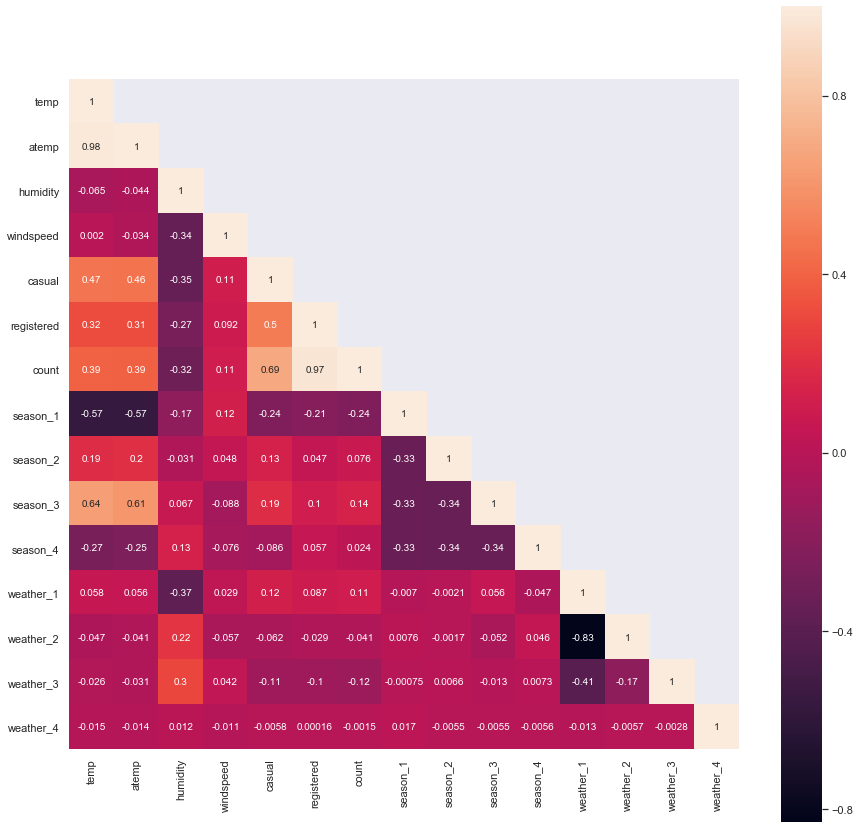

In [8]:
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True, mask=mask)
plt.gcf().set_size_inches(15, 15)
plt.gca().set_ylim(15, 0)